
# Exercise on resource allocation: the 'ERA' model

## Description of the 'ERA' whole-cell coarse-grained model

We consider an extremely simplified representation of a cell:

<img src='ERA-model-scheme.png' width=50%/>

As depicted above, the cell is made of only three coarse-grained molecular components: two types of proteins, $E$ and $R$, and a single species $A$ representing both protein precursors and energy.

* The job of $E$ proteins is to convert external nutrients into protein precursors $A$

* The job of $R$ proteins is to convert protein precursors $A$ into proteins ($E$ or $R$)

* We call $k$ the efficiency of transport and metabolism, i.e. protein precursors $A$ are produced at rate $k E$

* $\sigma$ and $a_{sat}$ are the enzymatic constants for $R$, i.e. the total rate of protein synthesis (which is also the consumption rate of $A$) is $\sigma \frac{a}{a+a_{sat}} R$ where $a = A / V$ is the concentration of protein precursors $A$

* The fractions $f_E$ and $f_R = 1 - f_E$ represent the cell proteome allocation, i.e. how much of total protein synthesis is invested in $E$ and $R$ proteins respectively 

* We assume that the cell maintains a constant mass density, so that the cell volume is always proportional to the cell  mass, which is equal to $E + R + A$ (we assume that $E$, $R$ and $A$ have the same mass). We choose the mass and volume units so that $M = V$. This means that mass fractions and concentrations are equivalent

## Interactive exploration of the model behavior

To explore how the model works in order to answer the questions (**they are after !**), you can play with the interactive simulations and plots below.

$\sigma$ has been fixed to 1 (it is just setting the time unit). $a_{sat}$ has been set to $0.01$.

In [1]:
# run this cell (by pressing SHIFT + ENTER when it is selected) to get started
import ERA_model_simulator

Exploration of the model behavior (press Run Interact to update)


interactive(children=(FloatSlider(value=0.0, description='fE', max=1.0, step=0.01), FloatSlider(value=5.0, des…

Exploration of model behavior using the concentration ODEs (press Run Interact to update)


interactive(children=(FloatSlider(value=0.0, description='fE', max=1.0, step=0.01), FloatSlider(value=5.0, des…

Exploration of how the allocation strategy impacts the growth rate (press Run Interact to update)


interactive(children=(FloatSlider(value=5.0, description='k', max=10.0, min=0.01, step=0.01), FloatSlider(valu…

## Questions

1) What is represented by $R$? What are the generic names for the enzymatic constants $\sigma$ and $a_{sat}$?

2) In your opinion, should $k$ depends on the composition of the media? And on the strain genotype?

3) Write down differential equations representing the temporal evolution of the **amounts** of $A$, $E$ and $R$

4) Find a simple expression for the instantaneous cell growth rate $\alpha = \frac{1}{V} \frac{dV}{dt}$ (think mass conservation and combine the differential equations)

5) **BONUS question - not required to continue**. Write down differential equations representing the temporal evolution of the **concentrations** $a$, $e$ and $r$ of $A$, $E$ and $R$

6) **BONUS question - not required to continue**. Solve the steady-state of the model. Hint: Eliminate $e$ and $r$ to find an equation in *a*

7) This model seems to always reach a state of steady (or balanced) exponential growth, where all components increase at the same (exponential rate), while the concentrations of components remain constant. To which extent is this steady-state dependent on initial conditions?

8) What growth rate and concentrations do you expect at steady-state for the extreme cases $f_E = 0$ and $f_E = 1$?

9) From now own we will fix $\sigma = 1$ and $a_{sat} = 0.01$ (this is the case for the interactive simulations and plots above). Propose a fixed allocation strategy (i.e. a value for $f_E$) for the four following conditions: $k = 0.1$, $k = 0.25$, $k = 1$ and $k = 2.5$. Your goal is to grow as fast as possible !

10) Describe with your words what governs how good a given choice of $f_E$ is. What trade-off seems to be at play here?

11) **Open question**. Let's assume that a cell can dynamically regulate or adapt its allocation strategy represented by the value $f_E$. Let's also assume that a cell can only sense **ONE** of the three internal concentration $e$, $r$ and $a$. What would you choose to sense in order to adapt the value of $f_E$? Let's call it $x$. Propose a dynamic regulation function $f_E = f(x)$ that you think is good (i.e., allows you to grow near optimally for a large range of environments, represented by different values of $k$). Don't forget that $f_E = 1 - f_R$, so you can also decide to have $f_R$ being primarily regulated. Hint 1: supply-driven activation. Hint 2: cf Weisse et al., 2015 paper.

> You can use the code below to test different regulation functions !

> If the simulation takes too long, it might be because of a 'jumpy', not continuous regulation function (it might hurt the ODE solver...)

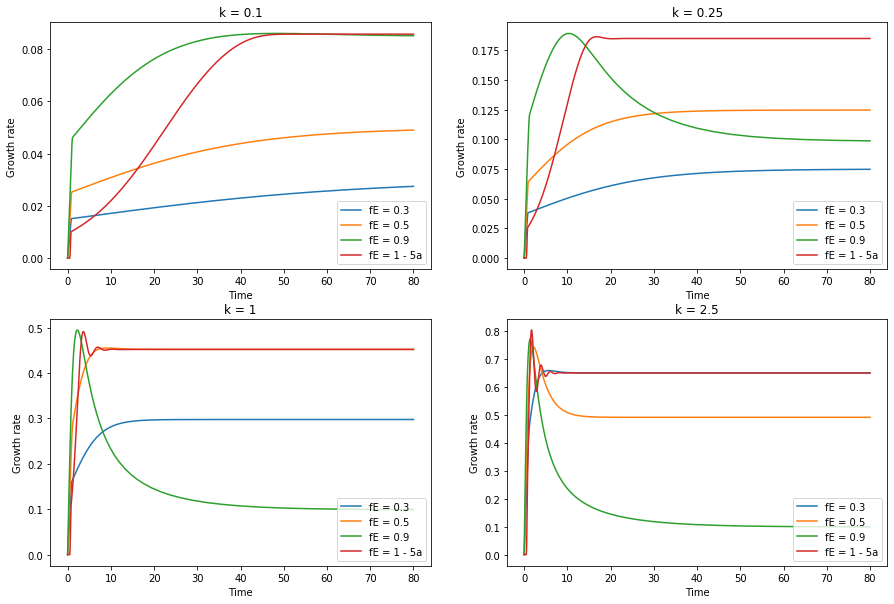

In [5]:
def fE_cst_0_3(e,r,a):
    return 0.3

def fE_cst_0_5(e,r,a):
    return 0.5

def fE_cst_0_9(e,r,a):
    return 0.9

def fE_pos_reg_a(e,r,a):
    fE = a / (a + 0.1)
    return fE

def fE_1_minus_a(e,r,a):
    return 1 - 5 * a

fE_reg_funs = [('fE = 0.3',fE_cst_0_3), 
           ('fE = 0.5',fE_cst_0_5), 
           ('fE = 0.9',fE_cst_0_9), 
           ('fE = 1 - 5a',fE_1_minus_a)]

ERA_model_simulator.compare_regulation_functions(fE_reg_funs)